**Package scientitstools**

Analyse Factorielle des Correspondances

Ce tutoriel de présenter rapidement les principales fonctionnalités offertes par le package _scientisttools_ pour réaliser une Analyse Factorielle des Correspondances




## Format des données

les données doivent être un tableau de contingence. Nous utiliserons lejeu de données [housetasks](https://rdrr.io/cran/factoextra/man/housetasks.html) disponible dasn le package [factoextra](https://cran.r-project.org/web/packages/factoextra/index.html) R.

(https://vincentarelbundock.github.io/Rdatasets/datasets.html)

In [1]:
# Load R datasets in Python
def load_rdatasets(packages=str,data_name=str):
    from rpy2.robjects.packages import importr, data
    import pandas as pd
    import numpy as np
    r_df = data(importr(packages)).fetch(data_name)[data_name]
    py_df = pd.DataFrame.from_dict({ key : np.asarray(r_df.rx2(key)) for key in r_df.names })
    py_df.index = r_df.rownames
    return py_df

In [2]:
# Données housetasks
housetasks = load_rdatasets(packages="factoextra",data_name="housetasks")
print(housetasks)

Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable


            Wife  Alternating  Husband  Jointly
Laundry      156           14        2        4
Main_meal    124           20        5        4
Dinner        77           11        7       13
Breakfeast    82           36       15        7
Tidying       53           11        1       57
Dishes        32           24        4       53
Shopping      33           23        9       55
Official      12           46       23       15
Driving       10           51       75        3
Finances      13           13       21       66
Insurance      8            1       53       77
Repairs        0            3      160        2
Holidays       0            1        6      153


In [3]:
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotnine as pn
from scientisttools.decomposition import CA
from scientisttools.pyplot import plotCA
from scientisttools.extractfactor import (
    get_eig,
    get_eigenvalue,
    get_ca,
    get_ca_row,
    get_ca_col)
from scientisttools.ggplot import fviz_screeplot

## AFC

In [4]:
my_ca = CA(n_components=None,
           row_labels=housetasks.index.values,
           col_labels=housetasks.columns.values,
           parallelize=False)
my_ca.fit(housetasks)

CA(col_labels=array(['Wife', 'Alternating', 'Husband', 'Jointly'], dtype=object),
   row_labels=array(['Laundry', 'Main_meal', 'Dinner', 'Breakfeast', 'Tidying',
       'Dishes', 'Shopping', 'Official', 'Driving', 'Finances',
       'Insurance', 'Repairs', 'Holidays'], dtype=object))

In [5]:
print(get_eigenvalue(my_ca))

       eigenvalue  difference  proportion  cumulative
Dim.1    0.542889    0.097887   48.692221   48.692221
Dim.2    0.445003    0.317954   39.912692   88.604913
Dim.3    0.127048         NaN   11.395087  100.000000


Le graphique des valeurs propres peut être produit à l'aide de la fonction *plot_eigenvalues* ou _fviz_screeplot_

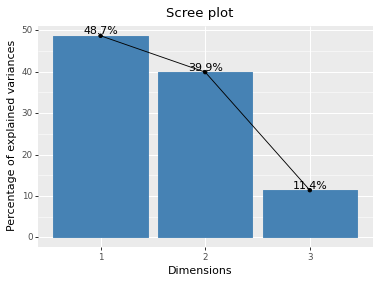

In [6]:
p = fviz_screeplot(my_ca,add_labels=True,choice="proportion")
print(p)

Le point auquel le graphique des valeurs propres montre un virage (appelé "coude") peut être considéré comme indiquant le nombre optimal d'axes principaux à retenir.

Il est également possible de calculer une valeur propre moyenne au - dessus de laquelle l'axe doit être conservé dans le résultat.

---
**_NOTE_**

Nos données contiennent $13$ lignes et $4$ colonnes.

Si les données étaient aléatoires, lavaleur attendue de la valeur propre pour chaque axe serait :


\begin{equation}
\dfrac{1}{I-1} = \dfrac{1}{13-1} = \dfrac{1}{12}=8.33\%
\end{equation}

en termes de lignes.

De même, l'axe moyen devrait représenter 

\begin{equation}
\dfrac{1}{J-1} = \dfrac{1}{4-1} = \dfrac{1}{3}=33.33\%
\end{equation}

en termes de colonnes.

---

Selon

> **_NOTE:_**  Tout axe avec une contribution supérieure au maximum de ces deux pourcentages devrait être considéré comme important et inclus dans la solution pour l'interprétation des données.

Le code **python** ci - dessous, montre le graphique des valeurs propres

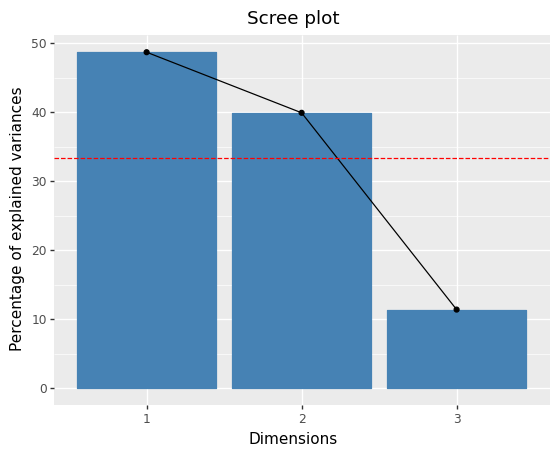

In [7]:
# 
p = fviz_screeplot(my_ca,add_labels=False,choice="proportion",add_kaiser=False)
p = p + pn.geom_hline(yintercept = 33.33,linetype="--",color="red") 
print(p)

## Graphique des points lignes

### Résultats

La fonction *get_ca_row()* est utilisée pour extraire les résultats pour les lignes. Cette fonction renvoie un dictionnaire contenant les coordonnées, les cos2 et les contributions.

In [8]:
print(help(get_ca_row))

Help on function get_ca_row in module scientisttools.extractfactor:

get_ca_row(self) -> dict
    self. : an instance of class CA
    
    Returns
    -------
    Correspondence Analysis - Results for rows
        Name        Description
    1   "coord"     "coordinates for the rows"
    2   "cos2"      "cos2 for the rows"
    3   "constrib"  "contributions of the rows"
    4   "dist"      "Rows distance"
    5   "res.dist"  "Restitued distance"
    6   "infos"     "additionnal informations for the rows:"
                        - distance between rows and inertia
                        - weight for the rows
                        - inertia for the rows

None


In [9]:
# Informations sur les points lignes
row = get_ca_row(my_ca)
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'res.dist', 'infos'])


---
Les composantes de la fonction *get_ca_row()* peuvent être utilisés dans le graphique des lignes comme suit:
- *row["coord"]* : coordonnées des lignes
---

### Coordonnées des points lignes

In [10]:
print(row["coord"].head(6))

               Dim.1     Dim.2     Dim.3
Laundry    -0.991837 -0.495322 -0.316729
Main_meal  -0.875585 -0.490109 -0.164065
Dinner     -0.692574 -0.308104 -0.207414
Breakfeast -0.508600 -0.452804  0.220405
Tidying    -0.393808  0.434344 -0.094214
Dishes     -0.188964  0.441966  0.266949


Utilisez la fonction _plotCA()_ pour visualiser

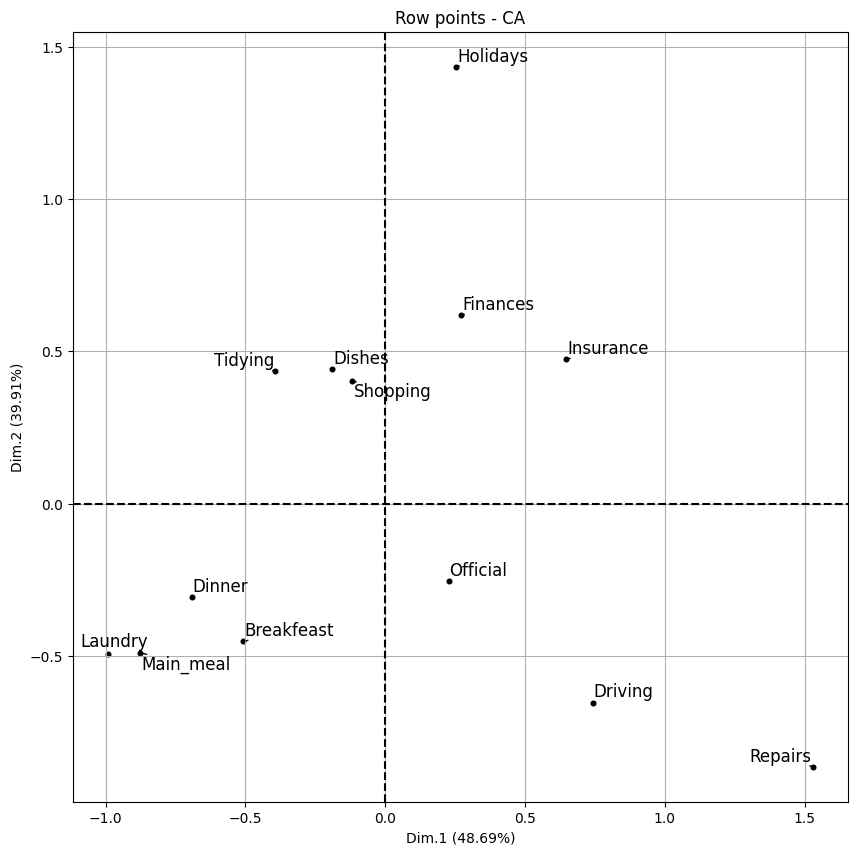

In [11]:
fig, axe = plt.subplots(figsize=(10,10))
plotCA(my_ca,repel=True)

#### Qualité de représentation des lignes

In [12]:
print(row["cos2"].head(6))

               Dim.1     Dim.2     Dim.3
Laundry     0.739987  0.184552  0.075460
Main_meal   0.741603  0.232359  0.026038
Dinner      0.776640  0.153703  0.069657
Breakfeast  0.504943  0.400230  0.094827
Tidying     0.439812  0.535015  0.025172
Dishes      0.118118  0.646153  0.235730


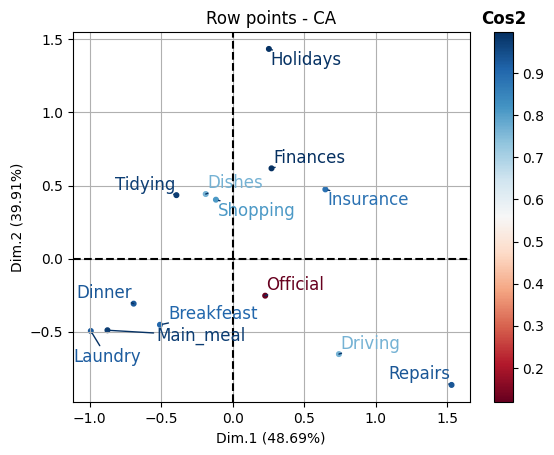

In [13]:
plotCA(my_ca,color="cos2",repel=True)

##### Contribution des lignes aux dimensions

In [14]:
print(row["contrib"].head(6))

                Dim.1     Dim.2     Dim.3
Laundry     18.286700  5.563891  7.968424
Main_meal   12.388843  4.735523  1.858689
Dinner       5.471398  1.321022  2.096926
Breakfeast   3.824928  3.698613  3.069399
Tidying      1.998352  2.965644  0.488734
Dishes       0.426166  2.844117  3.634294


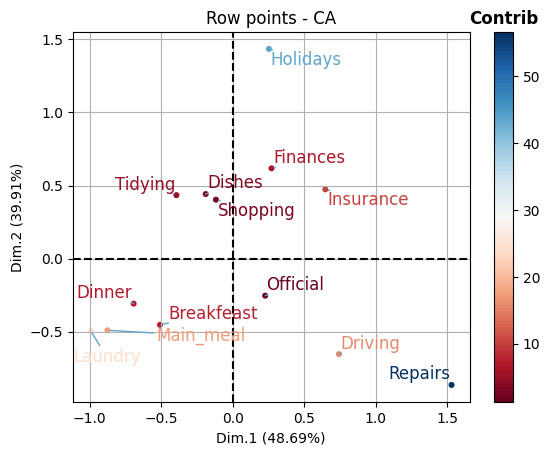

In [15]:
plotCA(my_ca,color="contrib",repel=True)

## Graphique des colonnes

### Résultats

In [16]:
col = get_ca_col(my_ca)
print(help(get_ca_col))

Help on function get_ca_col in module scientisttools.extractfactor:

get_ca_col(self) -> dict
    self : an instance of class CA
    
    Returns
    -------
    Correspondence Analysis - Results for columns
        Name        Description
    1   "coord"     "coordinates for the columns"
    2   "cos2"      "cos2 for the columns"
    3   "constrib"  "contributions of the columns"
    4   "dist"      "Columns distance"
    5   "res.dist"  "Restitued distance"
    6   "infos"     "additionnal informations for the columns :"
                        - distance between columns and inertia
                        - weight for the columns
                        - inertia for the columns

None


In [17]:
# coord
print(col["coord"])

                Dim.1     Dim.2     Dim.3
Wife        -0.837622 -0.365221 -0.199911
Alternating -0.062185 -0.291594  0.848589
Husband      1.160918 -0.601920 -0.188859
Jointly      0.149426  1.026579 -0.046443


#### Graphiques : qualité et contribution

In [18]:
from scientisttools.extractfactor import dimdesc
d = dimdesc(my_ca)
d.keys()

dict_keys(['Dim.1', 'Dim.2', 'Dim.3'])

In [19]:
d["Dim.1"]["row"]

,coord
Laundry,-0.991837
Main_meal,-0.875585
Dinner,-0.692574
Breakfeast,-0.508600
Tidying,-0.393808
Dishes,-0.188964
Shopping,-0.117681
Official,0.226632
Holidays,0.252486
Finances,0.270767


In [20]:
d["Dim.1"]["col"]

,coord
Wife,-0.837622
Alternating,-0.062185
Jointly,0.149426
Husband,1.160918
